In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_excel('Data_Train.xlsx')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.shape

(10683, 11)

In [7]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dropna(inplace = True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

exploratory data analysis in the dataset 
first we need to extract the date and month from the date of journey column for that we will use the to_datetime function describe in pandas

In [11]:
train_data["journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [12]:
print(train_data['journey_day'])

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: journey_day, Length: 10682, dtype: int64


In [13]:
train_data["journey_month"] = pd.to_datetime(train_data.Date_of_Journey, format = "%d/%m/%Y").dt.month

In [14]:
print(train_data['journey_month'])

0        3
1        5
2        6
3        5
4        3
        ..
10678    4
10679    4
10680    4
10681    3
10682    5
Name: journey_month, Length: 10682, dtype: int64


In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
train_data.drop('Date_of_Journey', inplace = True, axis= 1)

In [17]:
#extracting the hours and the minute from the departure time

In [18]:
train_data["dep_hour"] = pd.to_datetime(train_data.Dep_Time).dt.hour

In [19]:
print(train_data['dep_hour'])

0        22
1         5
2         9
3        18
4        16
         ..
10678    19
10679    20
10680     8
10681    11
10682    10
Name: dep_hour, Length: 10682, dtype: int64


In [20]:
train_data["dep_min"] = pd.to_datetime(train_data.Dep_Time).dt.minute

In [21]:
print(train_data['dep_min'])

0        20
1        50
2        25
3         5
4        50
         ..
10678    55
10679    45
10680    20
10681    30
10682    55
Name: dep_min, Length: 10682, dtype: int64


In [22]:
train_data.drop('Dep_Time', inplace = True, axis = True)

In [23]:
train_data["arr_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

In [24]:
train_data["arr_minute"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

In [25]:
print(train_data['arr_minute'])

0        10
1        15
2        25
3        30
4        35
         ..
10678    25
10679    20
10680    20
10681    10
10682    15
Name: arr_minute, Length: 10682, dtype: int64


In [26]:
train_data.drop('Arrival_Time', inplace = True, axis = 1)

In [27]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [28]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [29]:
#adding duration hours and duration minutes to the dataset
train_data['duration_hours']= duration_hours
train_data['duration_minutes']= s=duration_mins

In [30]:
train_data.drop('Duration', axis = 1 , inplace = True)

In [31]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [32]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [33]:
#handling categorical data
#nominal data - data are not in any order - one hot encoding
#ordinal data - data follows an order# - labelencoder
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

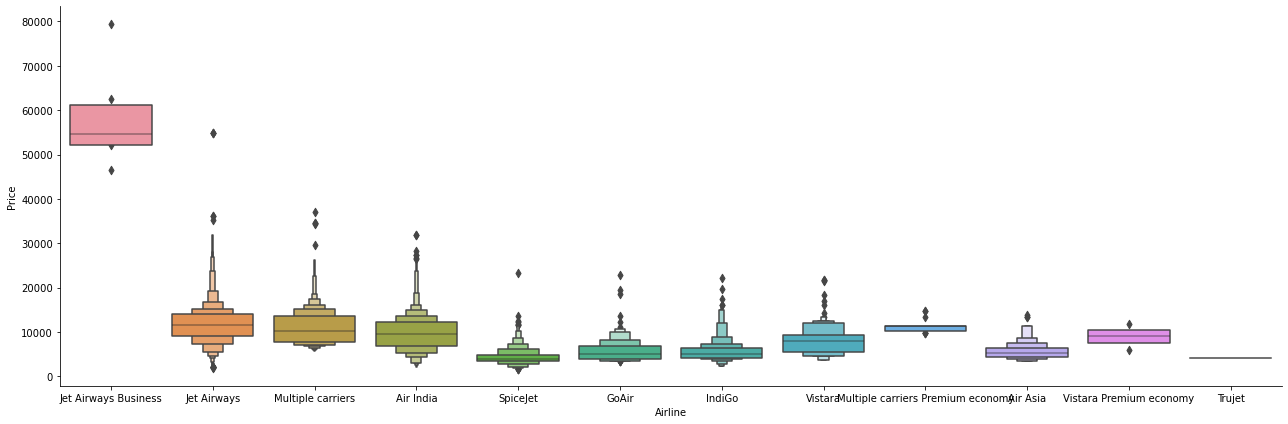

In [34]:
#airline vs price
sns.catplot(x = 'Airline', y = 'Price', data = train_data.sort_values("Price", ascending = False), kind = "boxen", height = 6, aspect = 3)
plt.show()

In [35]:
#as airline is nominal data one hot encoding will be used in the data
Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)

In [36]:
Airline.head()
#after this we will remove the airline column

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [37]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [38]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

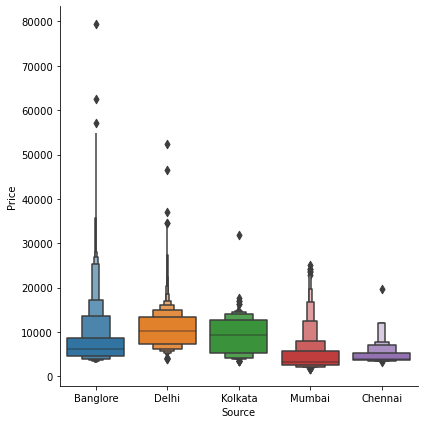

In [39]:
#source vs price prediction here we can also use the box plot
sns.catplot(x= 'Source', y = 'Price', data = train_data.sort_values('Price', ascending = False), kind = 'boxen', height = 6 , aspect = 1)

In [40]:
Source = train_data[['Source']]
Source = pd.get_dummies(Source, drop_first = True)

In [41]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [42]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [43]:
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)

In [44]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [45]:
#route and total stops are related to each other
train_data.drop(['Route', 'Additional_Info'], axis = 1 , inplace = True)

In [46]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [47]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [48]:
#for total stops ordinal encoding will be used as more no stops are having high price
train_data.replace({'non-stop':0, '1 stop':1, '2 stops': 2, '3 stops': 3, '4 stops':4}, inplace = True)

In [49]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [50]:
#concatinating the dataframe 
data_train = pd.concat([train_data, Destination, Source, Airline], axis = 1)


In [51]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_minute,duration_hours,duration_minutes,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [52]:
data_train.drop(['Airline','Source', 'Destination'],inplace = True, axis = 1)

In [53]:
data_train.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_minute,duration_hours,duration_minutes,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [54]:
data_train.shape

(10682, 30)

In [55]:
#here to prevent the data leakage we will separate the train and test data and perform all the above operation on the test data
test_data = pd.read_excel('Test_set.xlsx')

In [56]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()
print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [57]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## feature selection
following are the best methods for the feature selection
1. heatmap
2. feature importance 
3. selectKbest
--- feature scaling is done on the basis of the algorithm we are going to use in the future

In [58]:
data_train.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arr_hour', 'arr_minute', 'duration_hours',
       'duration_minutes', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [59]:
X = data_train.drop('Price',axis = 1)

In [80]:
X.shape

(10682, 29)

In [60]:
Y = data_train['Price']

In [81]:
Y.shape

(10682,)

In [61]:
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<AxesSubplot:>

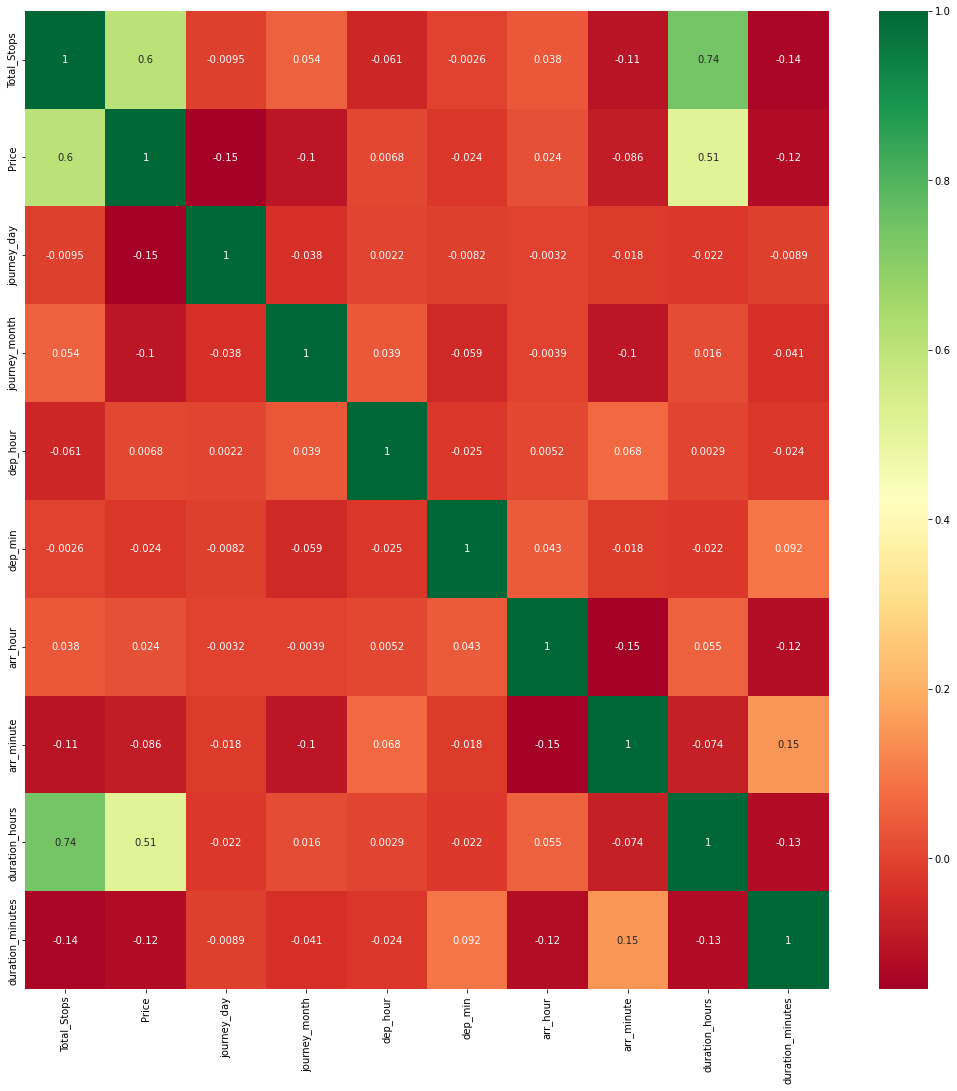

In [62]:
#Find the correlation between the independent variable and the dependent variable
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap= "RdYlGn")


In [63]:
#important trees using extratreesregressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

In [65]:
print(selection.feature_importances_)

[2.48206110e-01 1.44353753e-01 5.28180404e-02 2.42097358e-02
 2.14521257e-02 2.79610562e-02 1.93653431e-02 1.20234970e-01
 1.78163861e-02 9.91727235e-03 1.21010946e-02 6.54107583e-03
 4.88889265e-04 2.47849212e-02 5.34246584e-04 8.83212674e-03
 3.14305098e-03 6.80283217e-03 8.66976707e-03 2.11723134e-03
 1.91492818e-02 1.25889999e-01 6.67976206e-02 1.86571860e-02
 7.80886075e-04 3.35366658e-03 9.93279865e-05 4.83233906e-03
 8.96642757e-05]


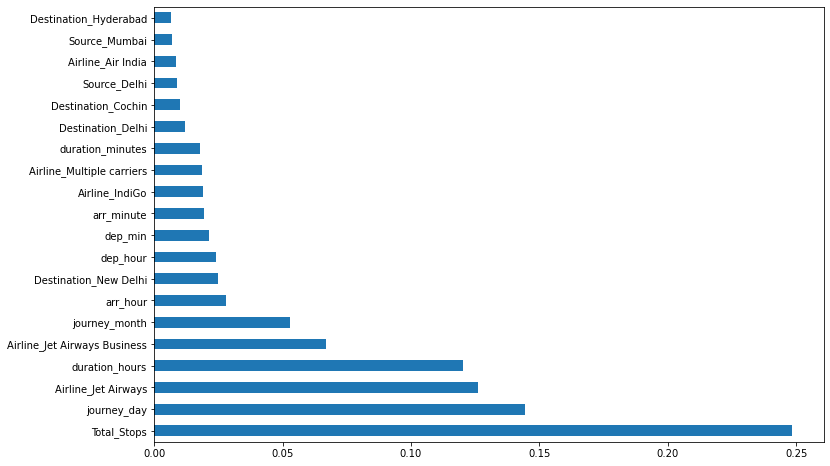

In [67]:
#plotting graph of feature importances for better visualization
plt.figure(figsize= (12,8))
feature_importances = pd.Series(selection.feature_importances_, index = X.columns)
feature_importances.nlargest(20).plot(kind= 'barh')
plt.show()

In [84]:
#using the random forest regressor in the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, train_size = 0.3, random_state= 42)

In [85]:
print(Y_train.shape)

(3204,)


In [86]:
X_train.shape

(3204, 29)

In [87]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [88]:
y_pred = reg_rf.predict(X_test)

In [89]:
reg_rf.score(X_train, Y_train)

0.9582343102115399

In [90]:
reg_rf.score(X_test, Y_test)

0.766878457863158

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


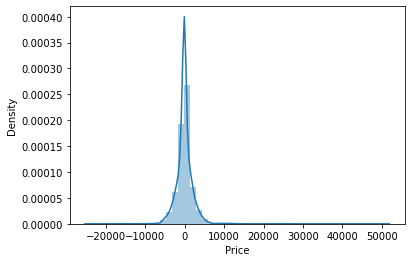

In [94]:
sns.distplot(Y_test- y_pred)
plt.show()

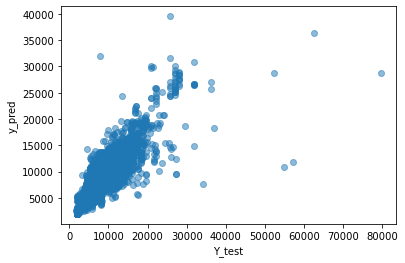

In [103]:
plt.scatter(Y_test, y_pred, alpha = 0.5)
plt.xlabel('Y_test')
plt.ylabel('y_pred')
plt.show()

In [104]:
from sklearn import metrics

In [106]:
print('MSE', metrics.mean_squared_error(Y_test, y_pred))
print('MAE', metrics.mean_absolute_error(Y_test, y_pred))
print('RMSE', np.sqrt( metrics.mean_absolute_error(Y_test, y_pred)))

MSE 4999336.194236714
MAE 1288.643857806082
RMSE 35.89768596728878


In [107]:
metrics.r2_score(Y_test, y_pred)

0.766878457863158

hyperparameter tuning

In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
#no of trees in the random forest
n_estimators = [int(x) for x in np.linspace (start = 100, stop =  1200, num = 12)]
#no of features to consider at every split
max_features = ['auto', 'sqrt']
#maximum no of levels in the tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
#min number of samples required to split the node
min_samples_split = [2,5,10,15,100]
#min number of samples required at leaf node
min_samples_leaf = [1,2,5,10]

In [110]:
#creating the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [112]:
#random search of parameters using the 5 fold cross validation in the dataset
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter= 10, cv = 5, verbose = 2,random_state = 42, n_jobs = 1)

In [113]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [118]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [119]:
prediction = rf_random.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


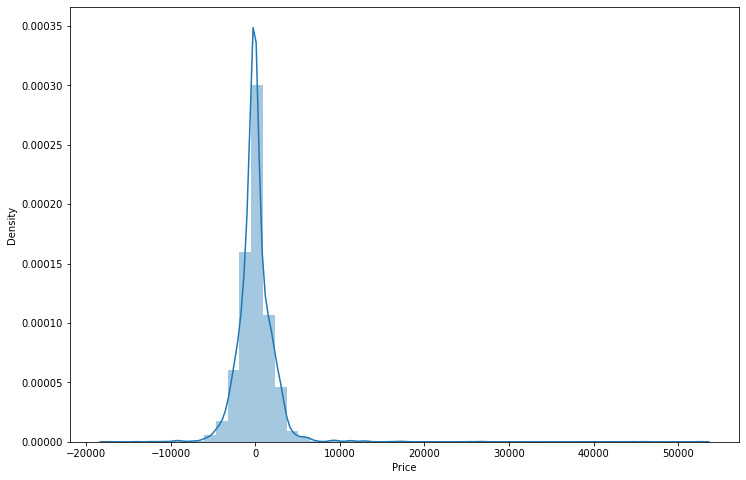

In [122]:
plt.figure(figsize = (12,8))
sns.distplot(Y_test-prediction)
plt.show()

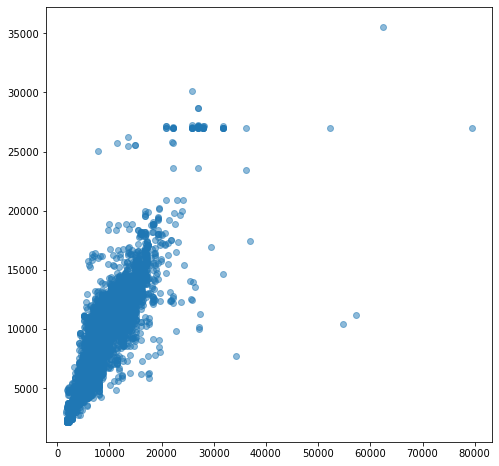

In [123]:
plt.figure(figsize = (8,8))
plt.scatter(Y_test, prediction, alpha = 0.5)
plt.show()

## saving the model to reuse it again


In [135]:
import pickle
file = open('flight_rf.pkl', 'wb')
pickle.dump(rf_random, file)


In [136]:
model = open('flight_rf.pkl', 'rb')
forest = pickle.load(model)

In [137]:
y_prediction =  forest.predict(X_test)

In [138]:
metrics.r2_score(Y_test, y_prediction)

0.7653676460326894